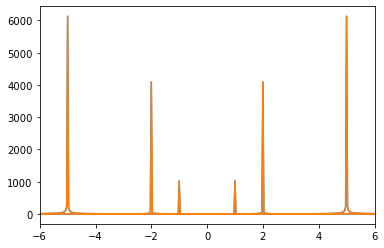

In [2]:
from fft import fft as mfft, ifft as mifft, fft_iterative
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftfreq, fftshift
from scipy.signal import find_peaks

data = np.genfromtxt('fftdata.dat')
x = data[:,0]
y = data[:,1]
N = len(x)
X = mfft(y)
X2 = fft_iterative(y)
f = mifft(X)

fig, ax = plt.subplots()

faxis = fftfreq(len(y), d=x[1]-x[0])


peaks, props = find_peaks(np.abs(X), height=100)

t = np.linspace(x[0], 5, 5000)
frecon = 1/len(y) * np.sum([np.abs(X[k]) * np.cos(2 * np.pi * faxis[k] * t + np.angle(X[k])) for k in peaks ], axis=0)

# np.savetxt('reconstructed.csv', np.column_stack((t,frecon)), header='t,x', comments='', delimiter=',')
# np.savetxt('spectrum.csv', np.column_stack((faxis,np.abs(X))), header='f,X', comments='', delimiter=',')
ax.plot(faxis, np.abs(X))
ax.plot(faxis, np.abs(X2))
ax.set_xlim((-6,6))

plt.show()